In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv
/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv


# Index
* Reading csv file
* EDA
* Univariate Analysis
* Bivariate Analysis

# Reading csv file

In [2]:
df1=pd.read_csv("/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv")

In [3]:
df2=pd.read_csv("/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv")

In [4]:
df1.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [5]:
df2.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


# EDA

# Univariate Analysis

In [6]:
df1.columns = ['#', 'refers to', 'sentiment', 'text']
df2.columns = df1.columns

In [7]:
df1['#'].value_counts()

352     1
6890    1
364     1
2567    1
7780    1
       ..
8955    1
1565    1
3361    1
8408    1
6960    1
Name: #, Length: 999, dtype: int64

In [8]:
df1['refers to'].value_counts()

RedDeadRedemption(RDR)               40
johnson&johnson                      39
FIFA                                 38
PlayerUnknownsBattlegrounds(PUBG)    38
LeagueOfLegends                      37
ApexLegends                          36
Nvidia                               35
TomClancysRainbowSix                 35
GrandTheftAuto(GTA)                  35
Fortnite                             34
Amazon                               34
AssassinsCreed                       33
Borderlands                          33
PlayStation5(PS5)                    33
Hearthstone                          32
Overwatch                            32
Verizon                              32
CS-GO                                32
Facebook                             32
CallOfDuty                           31
Cyberpunk2077                        30
WorldOfCraft                         30
MaddenNFL                            29
Microsoft                            28
Dota2                                27


In [9]:
df1['text'].value_counts()

Wow                                                                                                                                                                                                           2
They had a lawsuit over the opiates and the baby powder scandal why would they trust J&J?                                                                                                                     1
Congratulations to @ninamanning78 on publication day. Hope you have a fabulous day and that your book flies 😊📚🎉                                                                                               1
Chris loves me in borderlands one and two.                                                                                                                                                                    1
@EAMaddenNFL  this game so trash pic.twitter.com/sCUc6dtHeB                                                                                                             

In [10]:
df1['sentiment'].value_counts()

Neutral       285
Positive      277
Negative      266
Irrelevant    171
Name: sentiment, dtype: int64

In [11]:
TARGET = 'sentiment'

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   #          999 non-null    int64 
 1   refers to  999 non-null    object
 2   sentiment  999 non-null    object
 3   text       999 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB


In [14]:
df1.isnull().sum()

#            0
refers to    0
sentiment    0
text         0
dtype: int64

In [15]:
df2.isnull().sum()

#              0
refers to      0
sentiment      0
text         686
dtype: int64

# Cleaning the data

In [16]:
df2.dropna(inplace=True, axis=0)

In [17]:
texts = df1['text']

In [18]:
text_lens = [len(t.split()) for t in texts.values]
len_mean = np.mean(text_lens)

# Bivariate Analysis

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


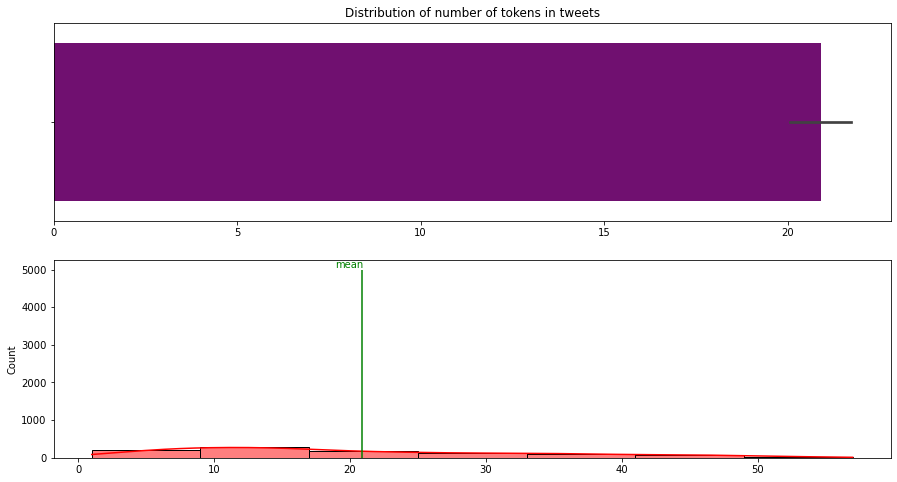

In [19]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
axes[0].set_title('Distribution of number of tokens in tweets')
sns.barplot(text_lens, ax=axes[0],color='purple')
sns.histplot(text_lens,bins=7, kde=True, ax=axes[1],color='r')
axes[1].vlines(len_mean, 0, 5000, color = 'g')
plt.annotate("mean", xy=(len_mean, 5000), xytext=(len_mean-2, 5050),color='g')
plt.show()

In [20]:
extreme_outliers = df1['text'][np.array(text_lens) > 125]

In [21]:
for i in extreme_outliers.index:
    print(i, 'Target', df1[TARGET][i])
    print(extreme_outliers[i])
    print('=-=-=-=-=-=-=-=-'*4, '\n')

In [22]:
outliers = df1['text'][np.array(text_lens) > 60]

In [23]:
for i in outliers.index:
    print(i, 'Target', df1[TARGET][i])
    print(outliers[i])
    print('=-=-=-=-=-=-=-=-'*4, '\n')

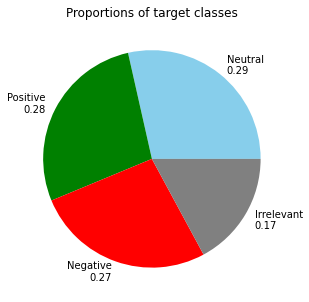

In [24]:

target_balance = df1[TARGET].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(target_balance, labels=[f'{i}\n{round(target_balance[i]/len(df1), 2)}' for i in target_balance.index], 
        colors=['skyblue', 'g', 'red', 'grey'])
plt.title('Proportions of target classes')
plt.show()

In [25]:
import re
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')

word_counts = {'Positive': [],
                'Neutral': [],
                'Irrelevant': [],
                'Negative': []}

pattern = re.compile('[^\w ]')
for text, t in zip(df1['text'], df1[TARGET]):
    text = re.sub(pattern, '', text).lower().split()
    text = [word for word in text if word not in stopwords_list]
    word_counts[t].extend(text)
               

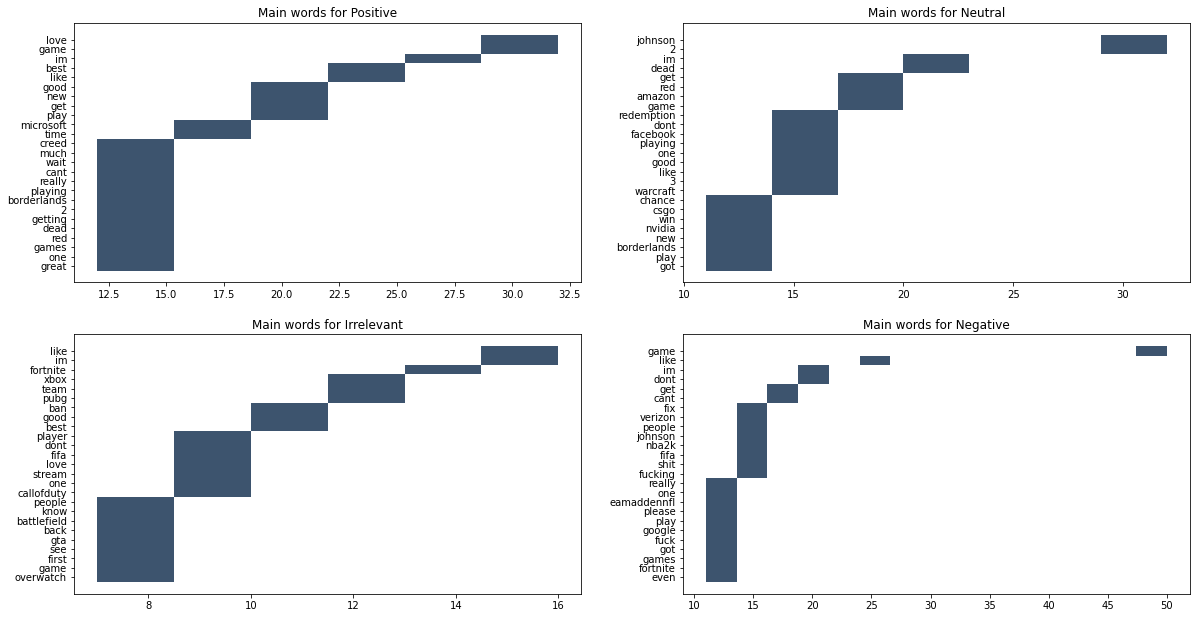

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(20,10.5))
for axis, (target, words) in zip(axes.flatten(), word_counts.items()):
    bar_info = pd.Series(words).value_counts()[:25]
    sns.histplot(x=bar_info.values, y=bar_info.index, ax=axis)
    axis.set_title(f'Main words for {target}')
plt.show()

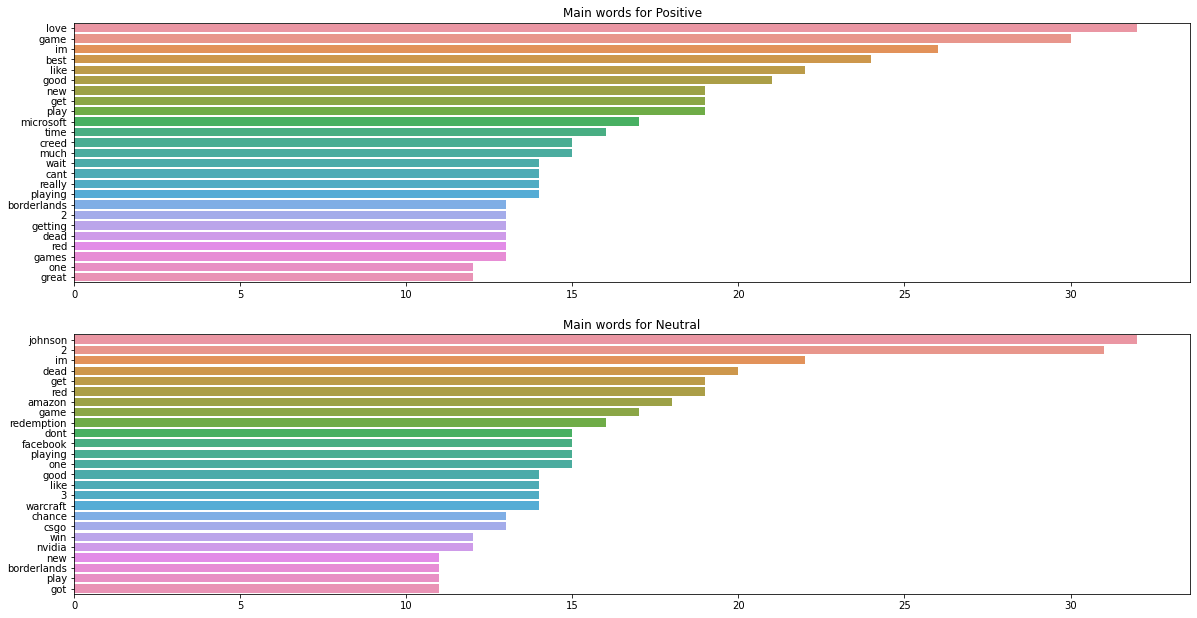

In [27]:
fig, axes = plt.subplots(2, figsize=(20,10.5))
for axis, (target, words) in zip(axes.flatten(), word_counts.items()):
    bar_info = pd.Series(words).value_counts()[:25]
    sns.barplot(x=bar_info.values, y=bar_info.index, ax=axis)
    axis.set_title(f'Main words for {target}')
plt.show()

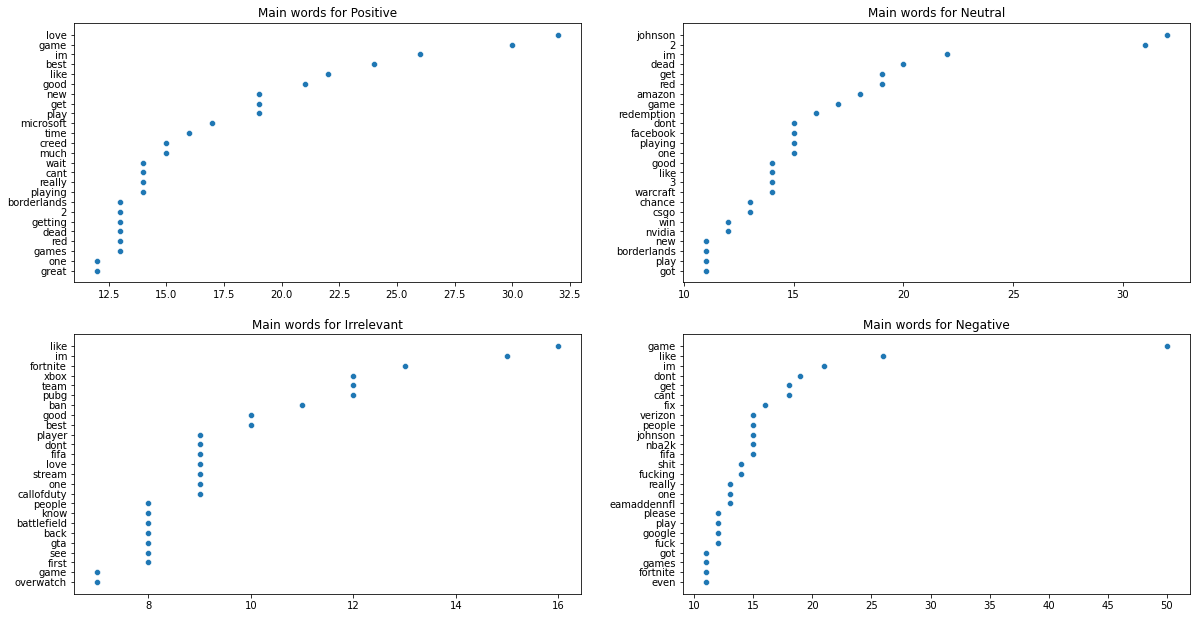

In [28]:
fig, axes = plt.subplots(2,2, figsize=(20,10.5))
for axis, (target, words) in zip(axes.flatten(), word_counts.items()):
    bar_info = pd.Series(words).value_counts()[:25]
    sns.scatterplot(x=bar_info.values, y=bar_info.index, ax=axis)
    axis.set_title(f'Main words for {target}')
plt.show()

In [29]:
tweets_len = {'Positive': [],
                'Neutral': [],
                'Irrelevant': [],
                'Negative': []}
pattern = re.compile('[^\w ]')
tweets_len = pd.DataFrame([len(re.sub(pattern, '', text).lower().split()) for text in df1['text'] if len(text)< 125],
                         columns=['len'])

In [30]:
tweets_len['target'] = df1[TARGET]

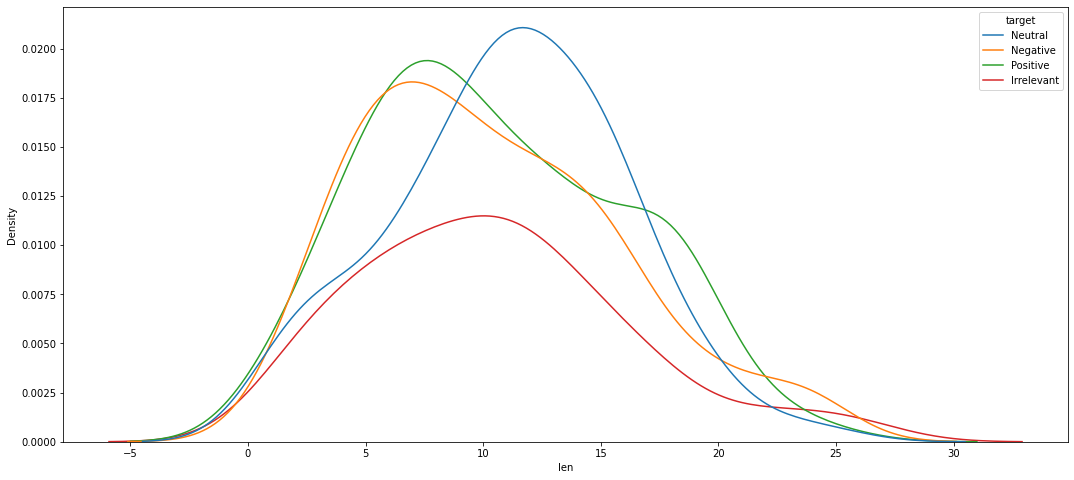

In [31]:
plt.figure(figsize=(18, 8))
sns.kdeplot(data=tweets_len, x='len', hue='target')
plt.show()

In [32]:
import emoji
import regex as re

def split_count(text):
    emoji_list = []
    data = re.findall(r'\X', text)
    for word in data:
        if any(char in emoji.EMOJI_DATA for char in word):
            emoji_list.append(word)
    
    return emoji_list

In [33]:
target_emojis = {'Positive': [],
                'Neutral': [],
                'Irrelevant': [],
                'Negative': []}

pattern = re.compile('\u200d')
for i, text in enumerate(texts):
    emoji_count = split_count(text)
    if emoji_count:
        emoji_count = [re.sub(pattern, '', e) for e in emoji_count]
        target_emojis[df1[TARGET].iloc[i]].extend(emoji_count)

Top emojis for Positive 
 ['👍', '😍', '🔥', '❤️', '😂', '❤', '👀', '😒', '💚', '😅', '♥️', '✊', '🤣', '😭', '🤬', '👊', '💙', '🤷♂️', '✌️', '💖']


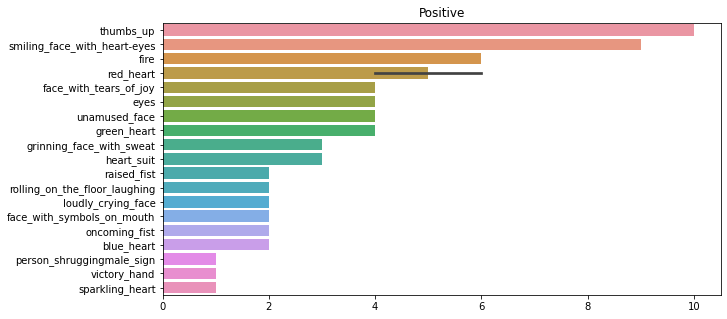

Top emojis for Neutral 
 ['😂', '🤔', '😻', '👉', '👈', '❤️', '😩', '🎯', '🤬', '💪', '🎉', '🎥', '😍', '✨', '😌', '🥺', '🔥', '🤘', '☺️', '👍']


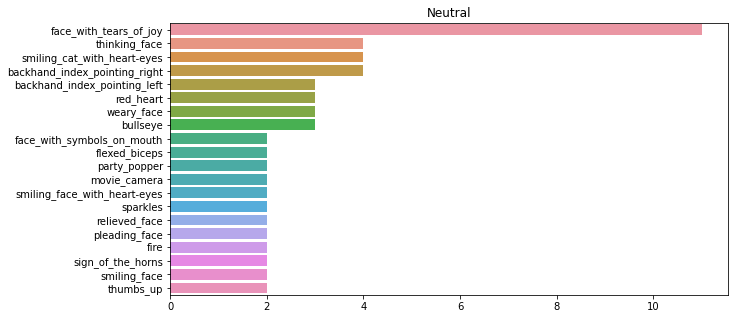

Top emojis for Irrelevant 
 ['🤣', '😂', '🔥', '☠️', '😍', '💚', '👀', '😌', '😊', '👍', '😭', '😀', '👨🏻💻', '✌🏻', '📚', '🎉', '👈', '👉', '🤡', '📵']


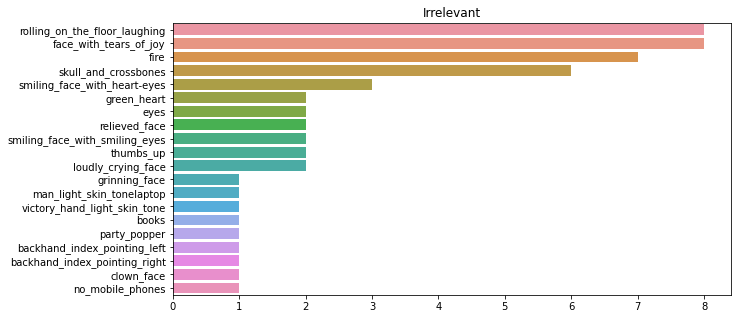

Top emojis for Negative 
 ['😭', '🥴', '🔥', '🖕🏻', '😂', '🤣', '🤦🏾♂️', '😅', '😫', '🙄', '💪', '🤷🏻♂️', '🙃', '😈', '🤦🏽♂️', '💀', '😐', '😶', '😆', '💔']


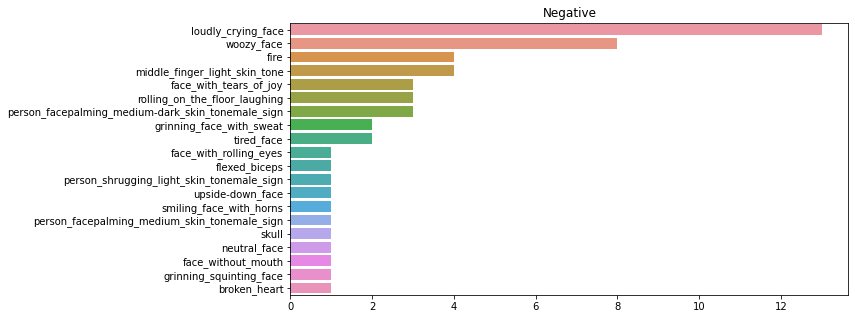

In [34]:
for t, emojis in target_emojis.items():
    plt.figure(figsize=(10, 5))
    bar_info = pd.Series(emojis).value_counts()[:20]
    print('=========='*10,  f'\nTop emojis for {t} \n', list(bar_info.index))
    bar_info.index = [emoji.demojize(i, delimiters=("", "")) for i in bar_info.index]
    sns.barplot(x=bar_info.values, y=bar_info.index)
        
    plt.title(f'{t}')
    plt.show()

Text(0.5, 1.0, 'Frequencies of meeting referred objects in each category')

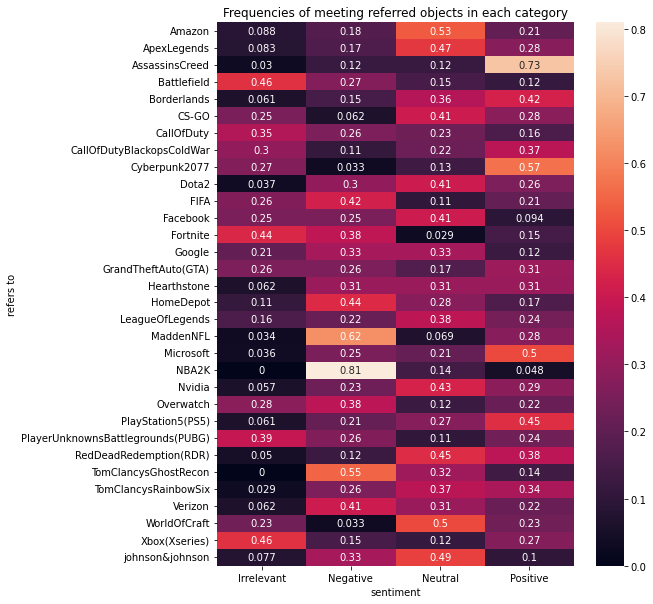

In [35]:
plt.figure(figsize=(8, 10))
sns.heatmap(pd.crosstab(df1['refers to'], df1[TARGET], normalize='index'), annot=True)
plt.title('Frequencies of meeting referred objects in each category')

Top emojis for Positive 
 ['👍', '😍', '🔥', '❤️', '😂', '❤', '👀', '😒', '💚', '😅', '♥️', '✊', '🤣', '😭', '🤬', '👊', '💙', '🤷♂️', '✌️', '💖']


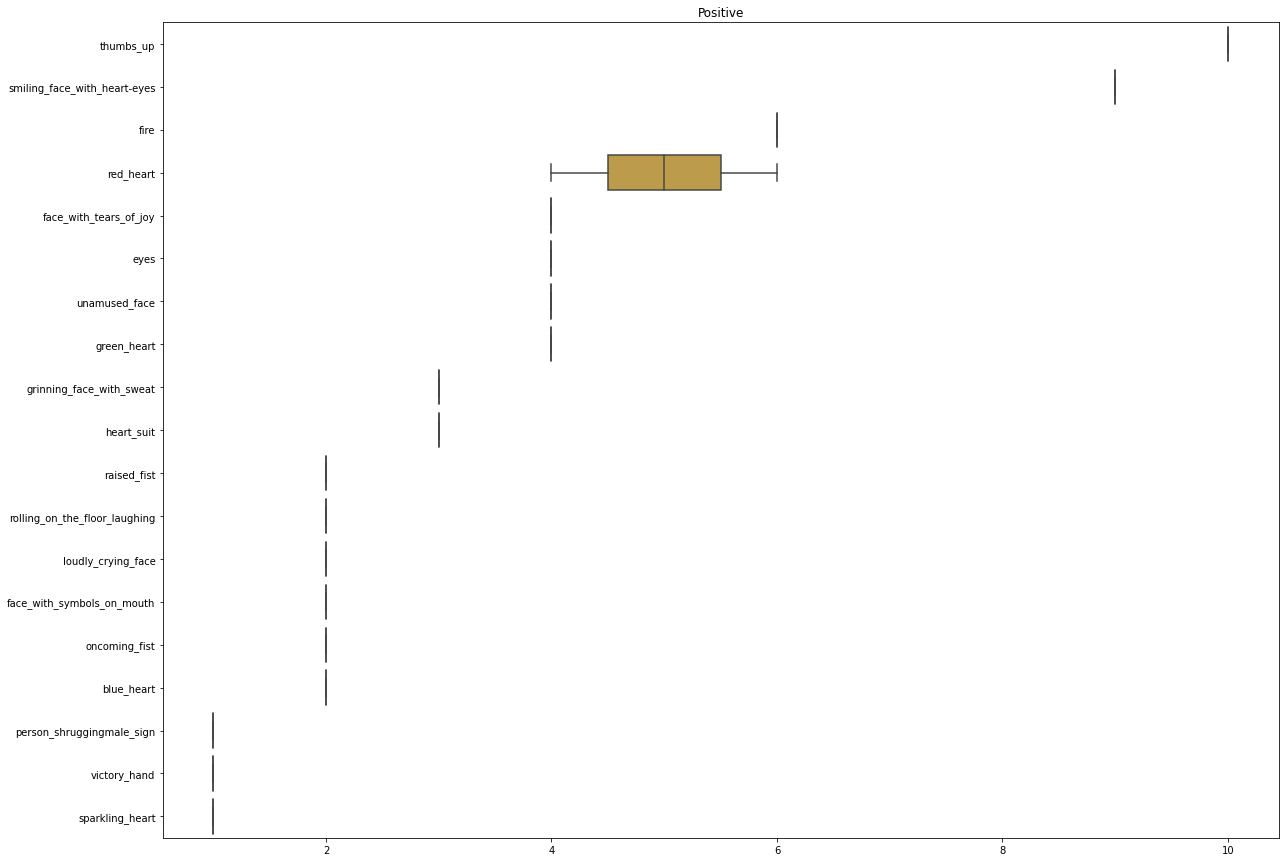

Top emojis for Neutral 
 ['😂', '🤔', '😻', '👉', '👈', '❤️', '😩', '🎯', '🤬', '💪', '🎉', '🎥', '😍', '✨', '😌', '🥺', '🔥', '🤘', '☺️', '👍']


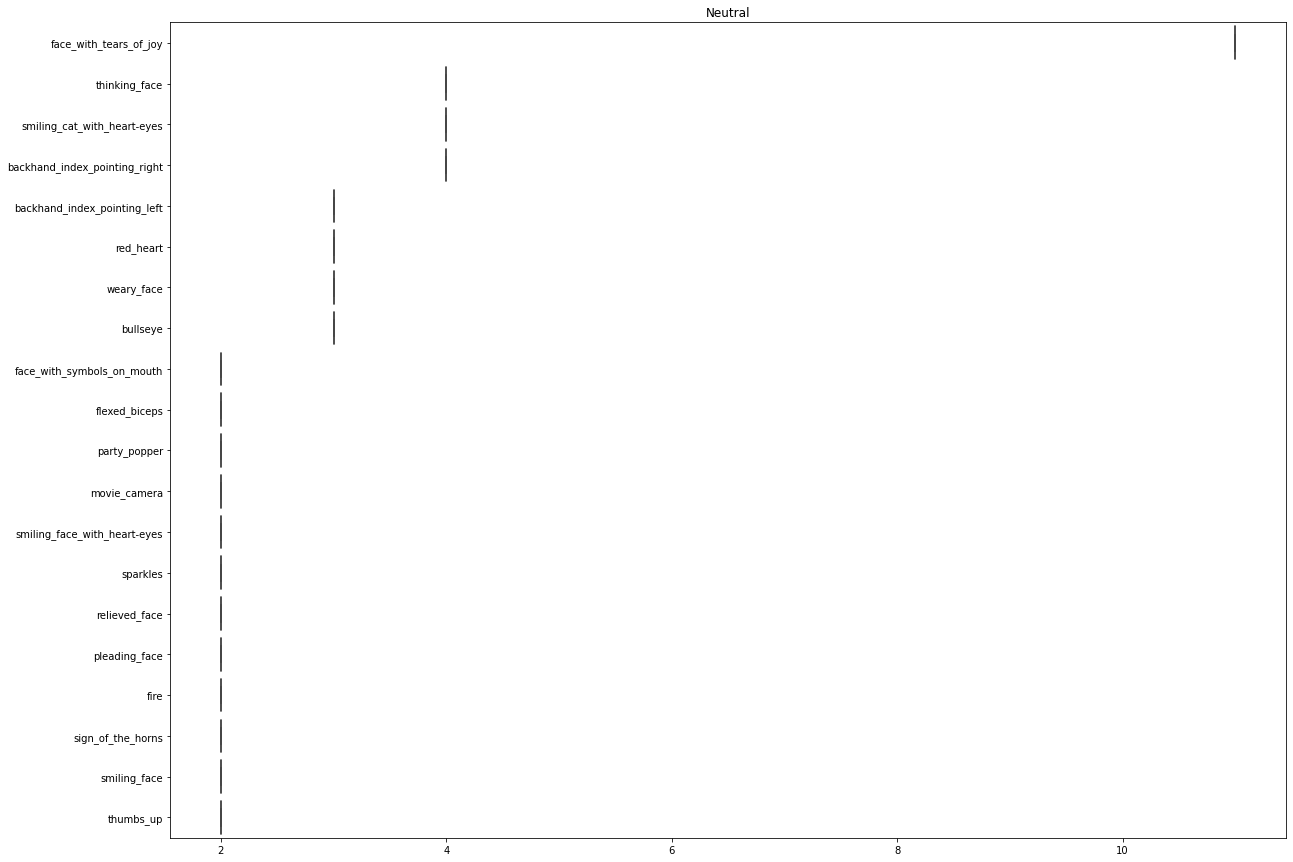

Top emojis for Irrelevant 
 ['🤣', '😂', '🔥', '☠️', '😍', '💚', '👀', '😌', '😊', '👍', '😭', '😀', '👨🏻💻', '✌🏻', '📚', '🎉', '👈', '👉', '🤡', '📵']


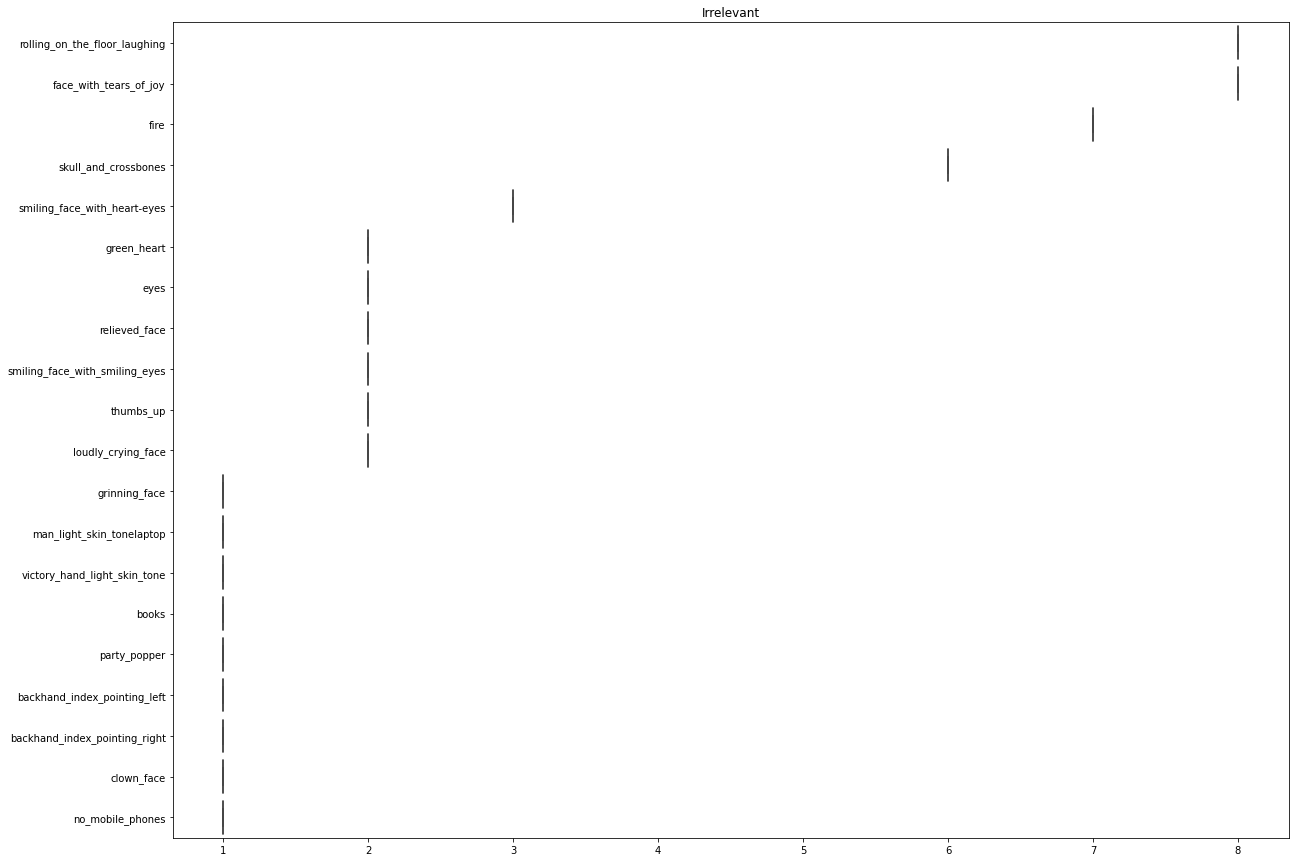

Top emojis for Negative 
 ['😭', '🥴', '🔥', '🖕🏻', '😂', '🤣', '🤦🏾♂️', '😅', '😫', '🙄', '💪', '🤷🏻♂️', '🙃', '😈', '🤦🏽♂️', '💀', '😐', '😶', '😆', '💔']


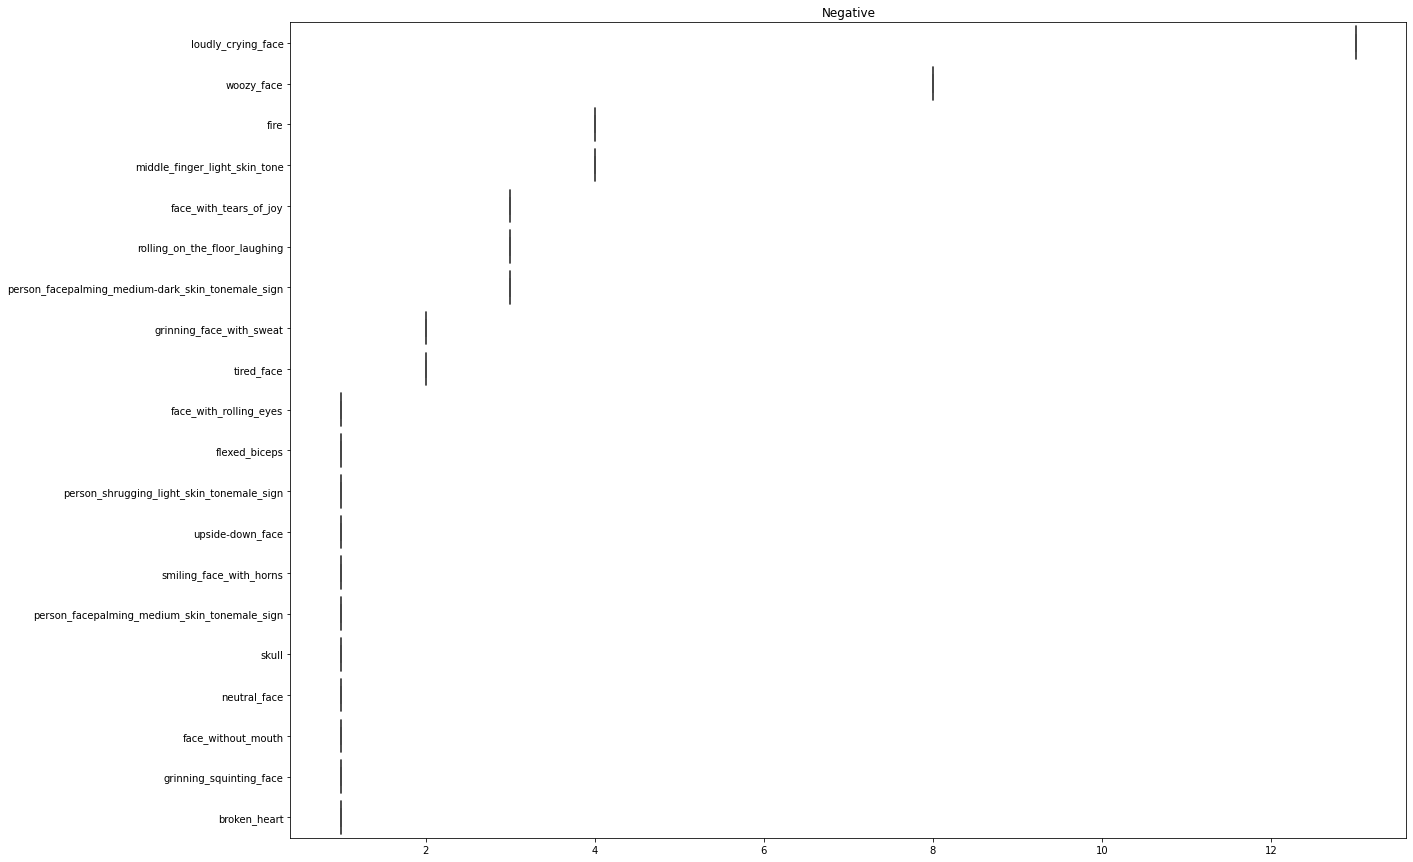

In [36]:
for t, emojis in target_emojis.items():
    plt.figure(figsize=(20, 15))
    bar_info = pd.Series(emojis).value_counts()[:20]
    print('=========='*10,  f'\nTop emojis for {t} \n', list(bar_info.index))
    bar_info.index = [emoji.demojize(i, delimiters=("", "")) for i in bar_info.index]
    sns.boxplot(x=bar_info.values, y=bar_info.index)
        
    plt.title(f'{t}')
    plt.show()

**Thank you**